# ML Assignment No. 02




In [1]:
import os
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print('Total %s data email'% len(df))

Total 5171 data email


# total class memebers

In [6]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

# show graph

C:\Users\Rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


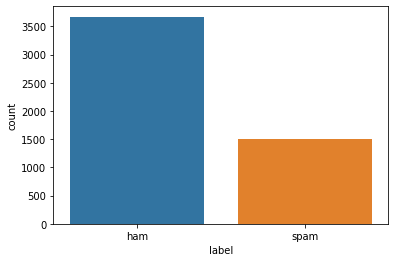

In [7]:
df_label = sns.countplot(df['label'])
df_label.set_xticklabels(df['label'].unique())
plt.show()

# data preprocessing
#data text cleaning
# punchuations

In [8]:
punct = []
for char in string.punctuation:
    punct.append(char)
 
    import re
    
def cleaning(txt):
    # case folding
    text = txt.lower()
    
    # remove multiple space, tabs, dan newlines
    text = re.sub('\s+',' ',text)    
    # remove links
    text = text.replace("http://", " ").replace("https://", " ")    
    # remove special characters
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())    
    # remove punctuation
    text = ''.join([word for word in text if word not in punct])    
    #remove single character
    text = re.sub(r"\b[a-zA-Z]\b", "", text)    
    #remove numbers
    text = re.sub(r"\d+", "", text)    
    #remove multiple spaces (again)
    text = re.sub('\s+',' ',text)    
    return text

# call function for cleaning
    # apply fungsi cleaning ke setiap text

In [9]:
df['text_cleaned'] = df['text'].apply(lambda x: cleaning(x))
df = df[['text', 'text_cleaned', 'label']]
df.head()

,text,text_cleaned,label
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter this is follow up...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom for january see attached file ...,ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho we re around to ...,ham
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...,spam
4,Subject: re : indian springs\r\nthis deal is t...,subject re indian springs this deal is to book...,ham


# compare

In [10]:
print(df['text'][0])
print(df['text_cleaned'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
subject enron methanol meter this is follow up to the note gave you on monday preliminary flow data provided by daren please override pop daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes 


# to remove stop words


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rushi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# lammitaization

In [13]:
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) 

def do_lemma(string):
    lemmatized = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(string)])
    return lemmatized

df['text_cleaned'] = df['text_cleaned'].apply(lambda x: do_lemma(x))

df = df.drop(['text'], axis=1)
df = df.rename(columns = {'text_cleaned' : 'text'})
df.columns

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y = df['label']

from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# defining the classifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

NameError: name 'WordNetLemmatizer' is not defined

# predicting the time of train and testing


In [14]:
t0 = time()
clf.fit(X_train, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")

NameError: name 'time' is not defined

# predicting the time of  testing

In [15]:
t1 = time()
pred = clf.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s\n")

NameError: name 'time' is not defined

# calculating and printing the accuracy of the algorithm

In [16]:
print("Accuracy of KNN Algorithm: ", accuracy_score(pred,y_test))

NameError: name 'pred' is not defined